<a href="https://colab.research.google.com/github/JonnDeleon/Glass-Data-Models/blob/main/GlassData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GLASS CLASSIFICATION
##F1 Score before and after applying SMOTE.

### 1) Importing and Preparing Data

In [128]:
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [129]:
# Import Data from link
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
glassdata = pd.read_csv(url, header=None)
glassdata = glassdata.drop(glassdata.columns[[0]], axis=1) # drop ID Column
glassdata.columns= ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type' ] # Add column names
glassdata.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [130]:
#Check for Nulls
glassdata.isnull().values.any()

False

In [131]:
glassdata.shape

(214, 10)

In [132]:
glassdata.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
type      int64
dtype: object

In [133]:
# number of unique glass types
glassdata['type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: type, dtype: int64

The count of types is unbalanced. There are different ways of handling unbalanced data. 

1) Undersampling - This will not be performed since reducing the size of majority classes to match the others will result in a small dataset.

2) Oversampling - SMOTE will be used to create synthetic data that will increase the size of the underrepresented classes to match the larger classes.

3) F1 Score - Calculates the harmonic mean of both precision and recall. Making it a good option for imbalanced datasets. 

In [134]:
glassdata.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The mean of Si is much higher than the rest and thus on a different scale. KNN and SVC are not scale-invariant. Normalization will need to be done to correct this before building the models. 

### 2) Data Visualization 

#### Univarative Plots

In [135]:
import matplotlib

x = glassdata.iloc[:, : 9]

y = glassdata.iloc[:,9]

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


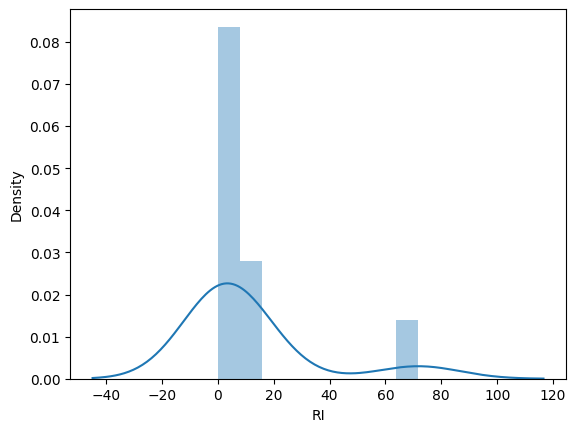

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


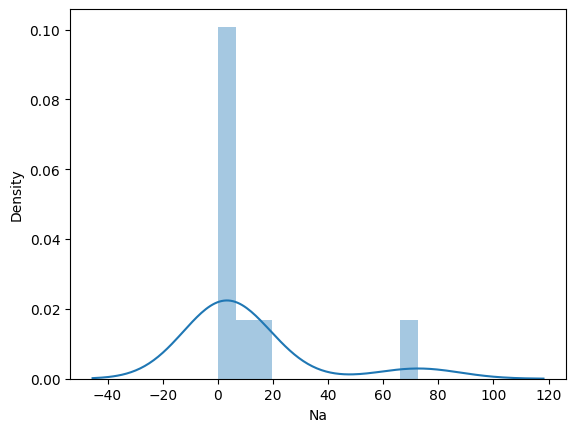

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


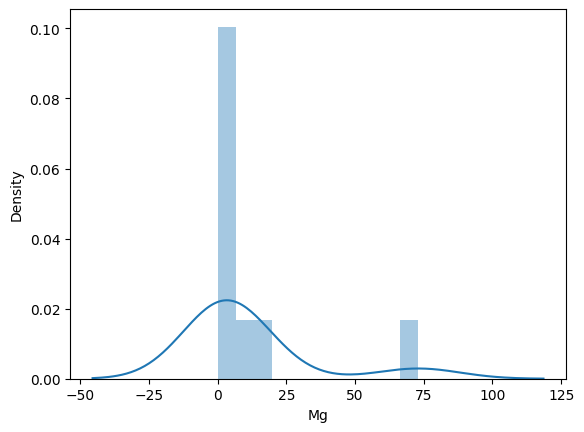

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


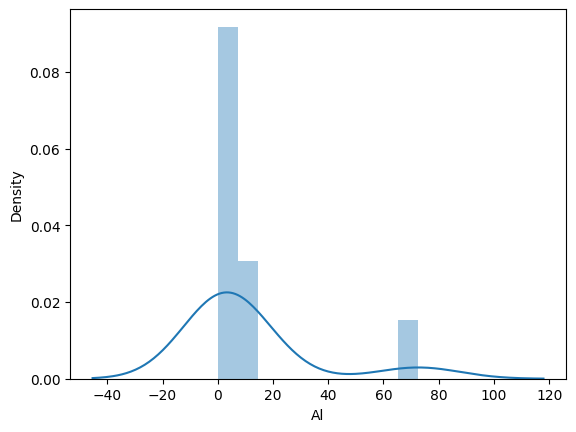

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


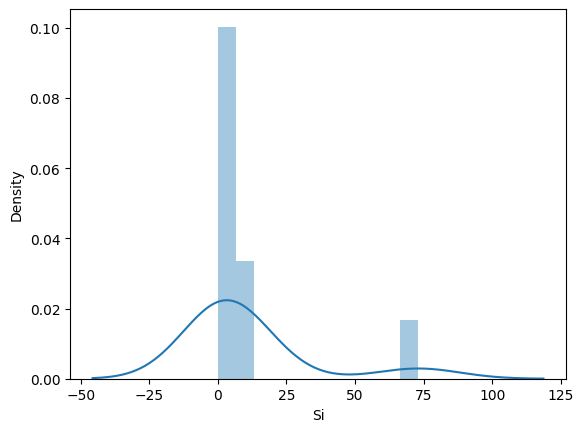

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


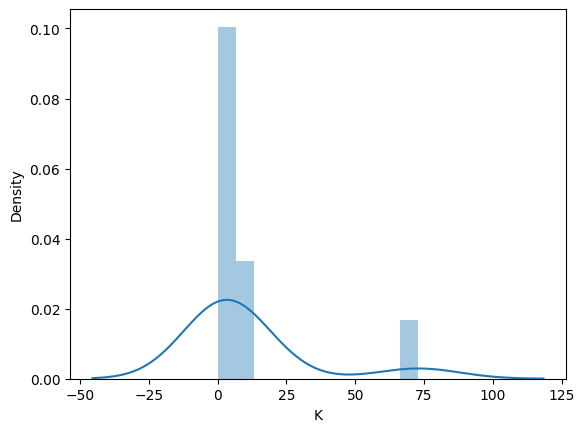

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


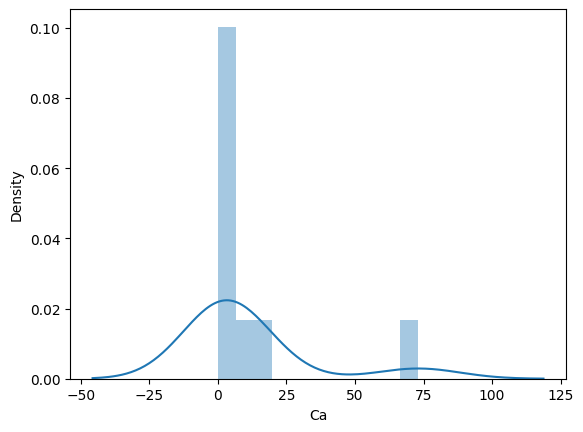

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


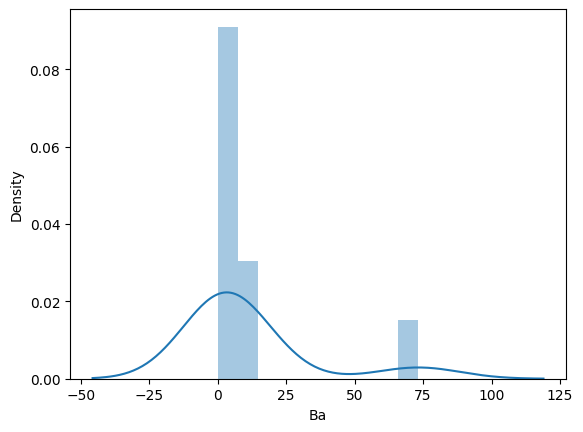

<ipython-input-136-a388c09c54b0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


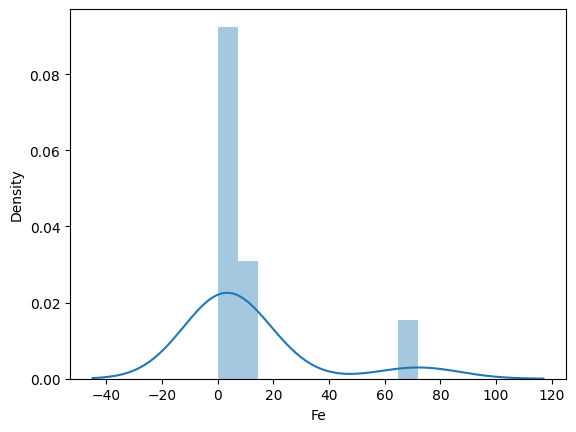

In [136]:
from matplotlib import pyplot as plt
import seaborn as sns
for i in range(0,9):
        sns.distplot(x.values[i])
        plt.xlabel(x.columns[i])
        plt.show()

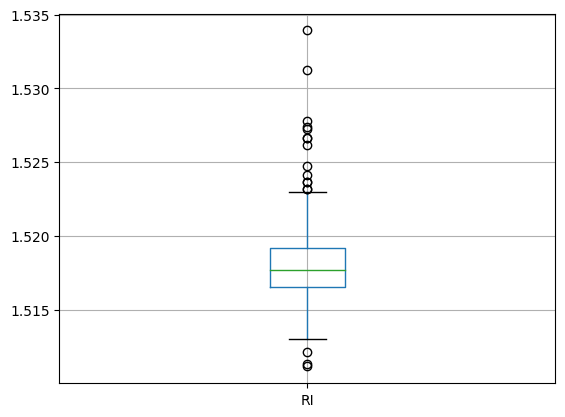

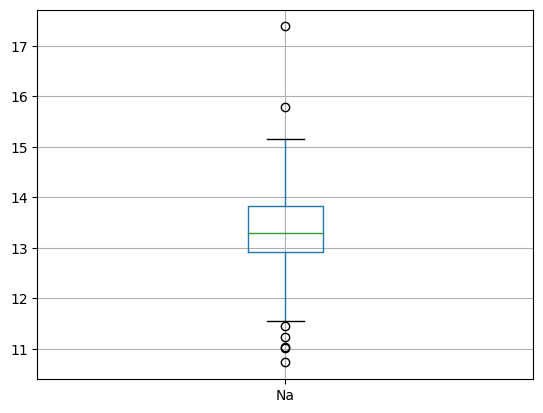

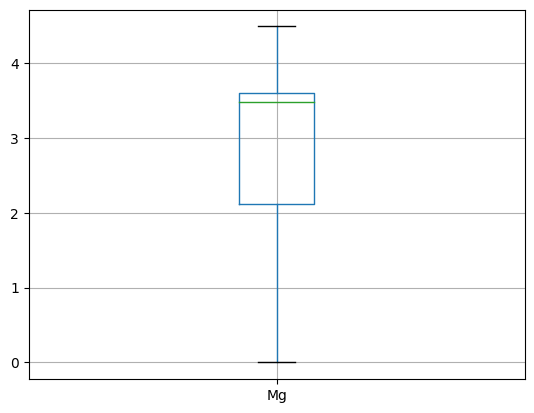

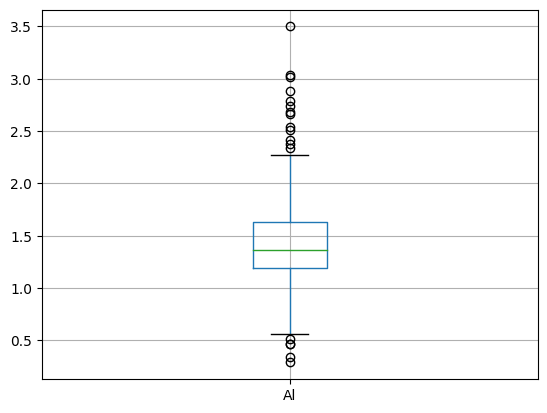

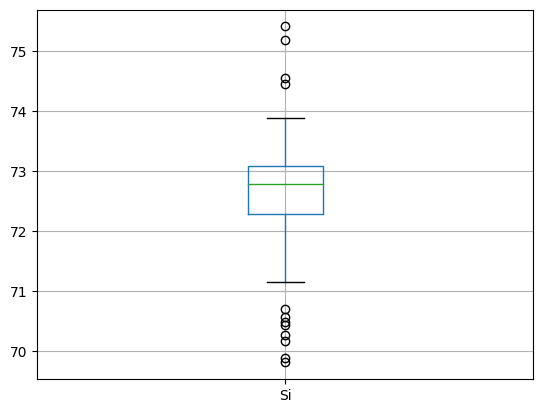

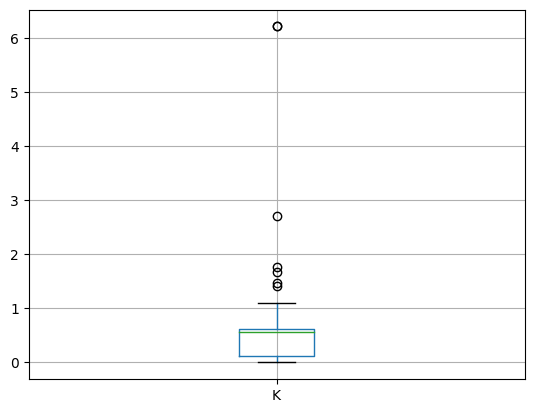

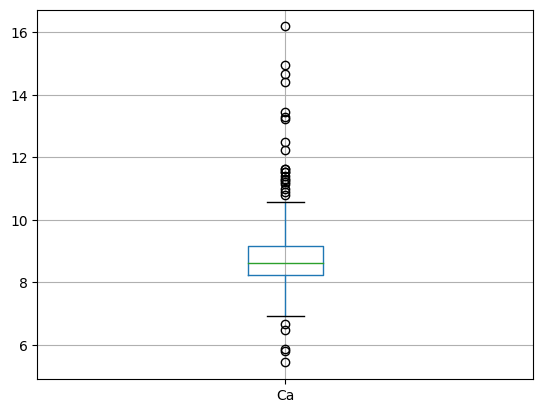

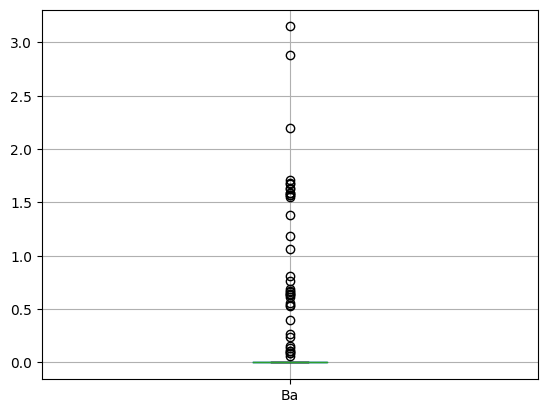

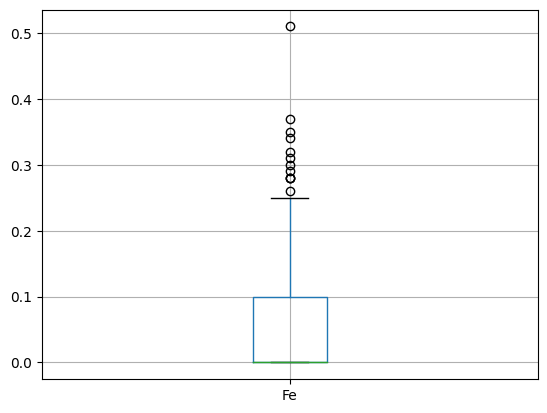

In [137]:
for i in x.columns:
  x.boxplot(column = i)
  plt.show()


The graphs above are skewed.

#### Multivartive Plots


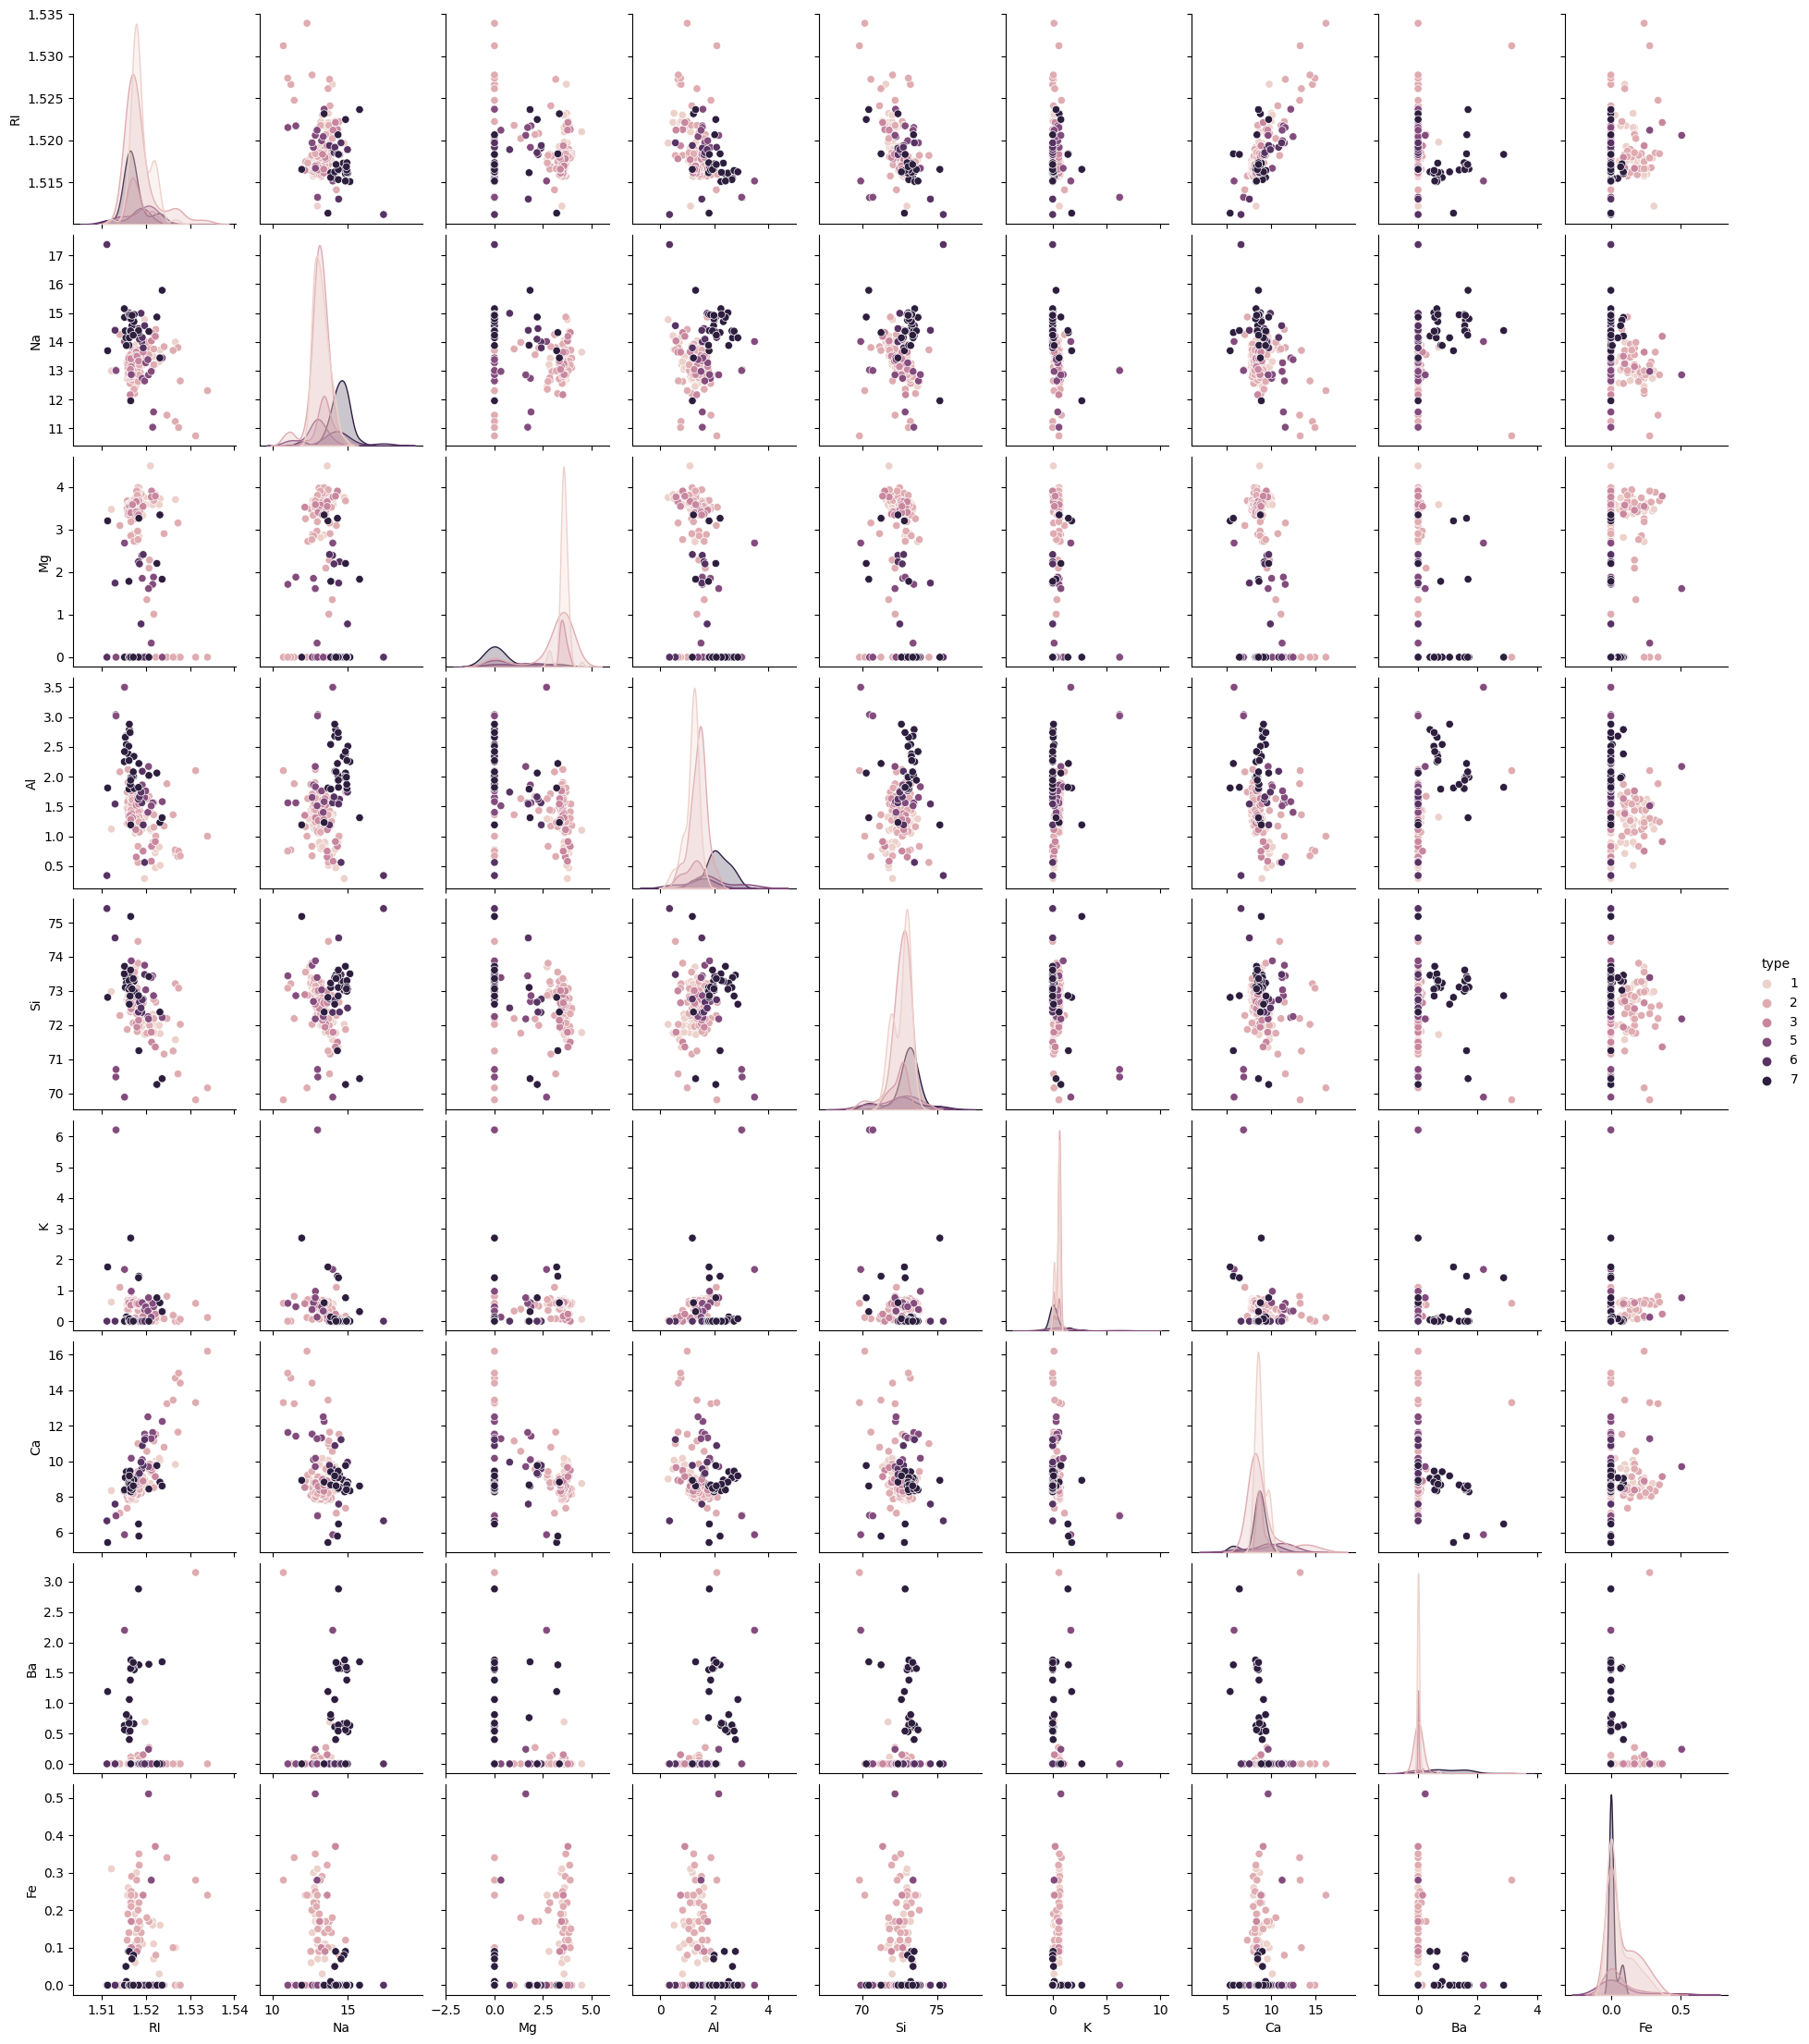

In [138]:
sns.pairplot(
    data=glassdata, 
    aspect=.85,
    hue = 'type');

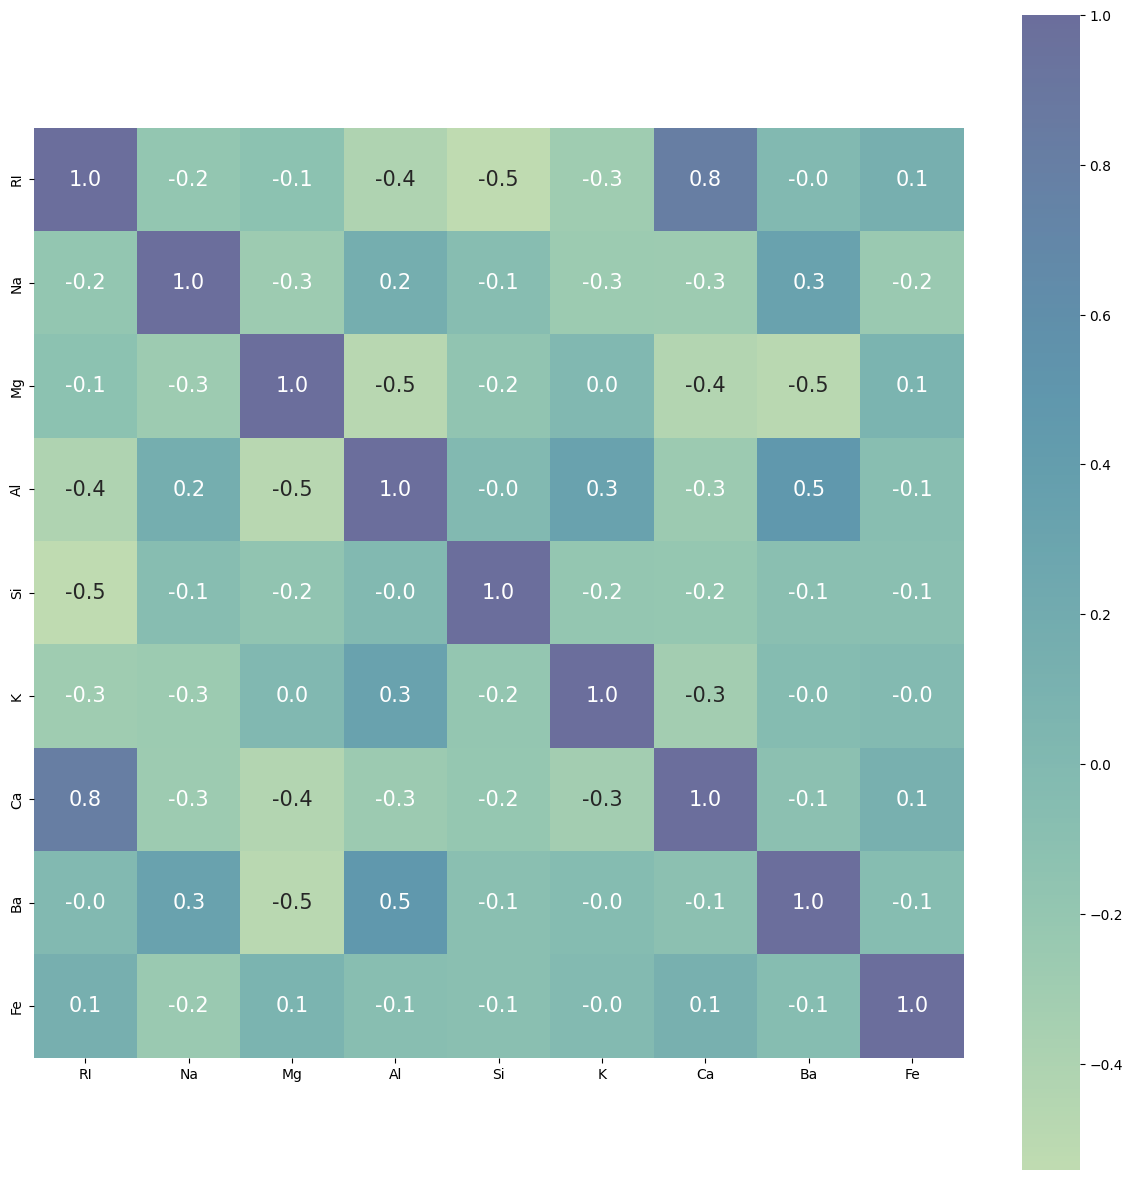

In [139]:
corr= x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=x.columns,yticklabels=x.columns,alpha=0.7, cmap = "crest")
plt.show()

RI and Ca are showing a strong correlation. So as one increases, so does the other. 

### 3) Creating Train and Test Data 

In [140]:
import numpy as np
from sklearn import model_selection 
from sklearn.model_selection import train_test_split

In [141]:
x_data = (x - np.min(x) ) / (np.max(x) - np.min(x) ).values
x_data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


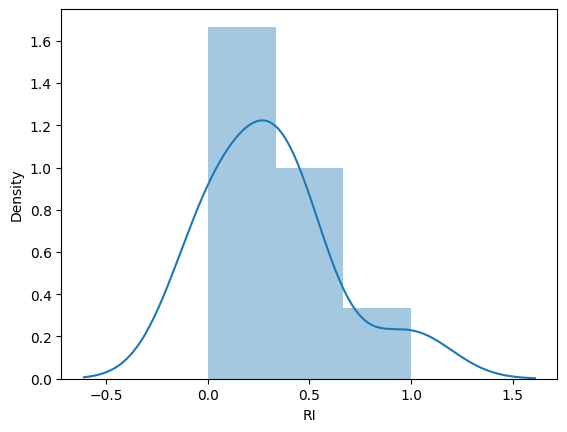

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


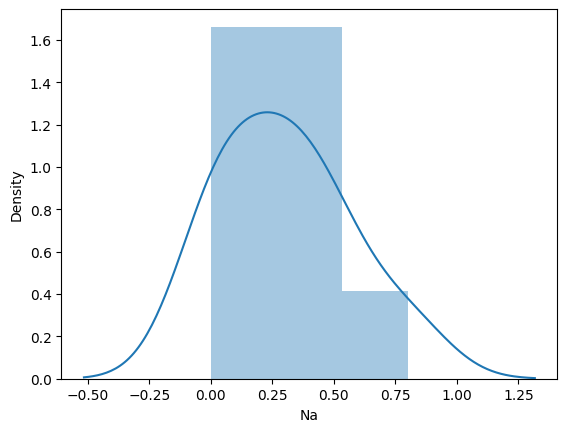

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


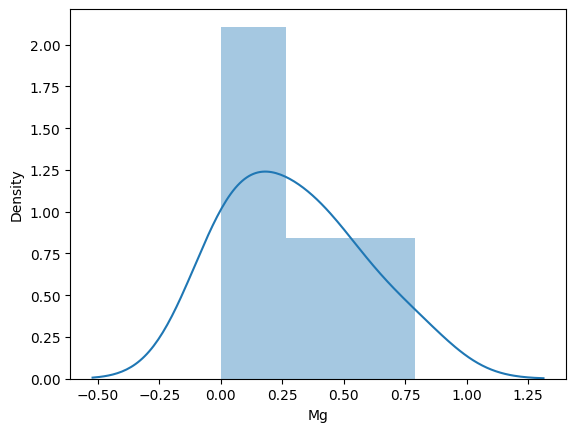

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


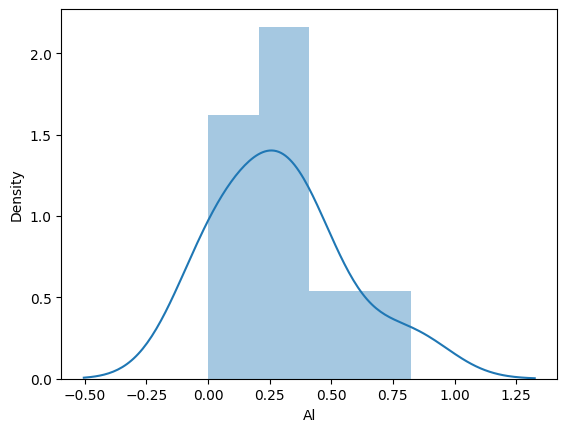

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


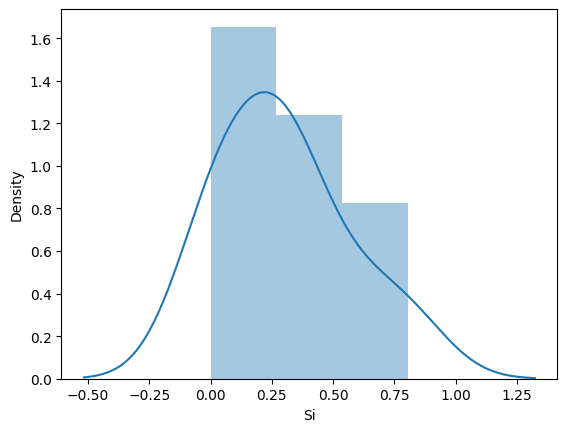

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


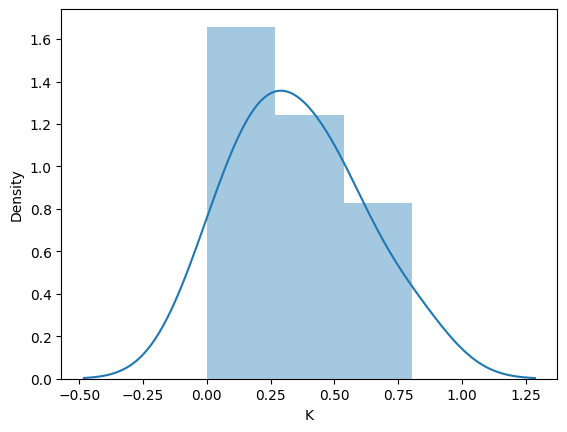

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


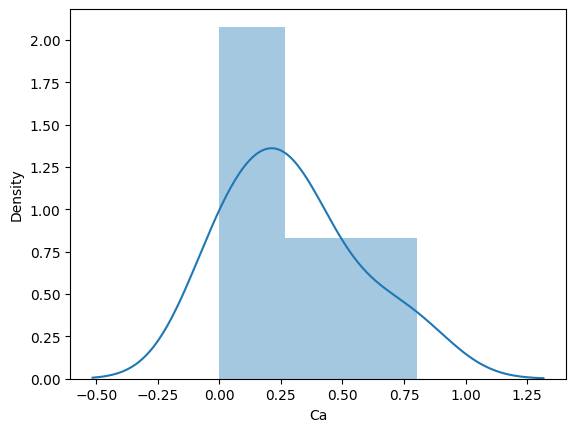

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


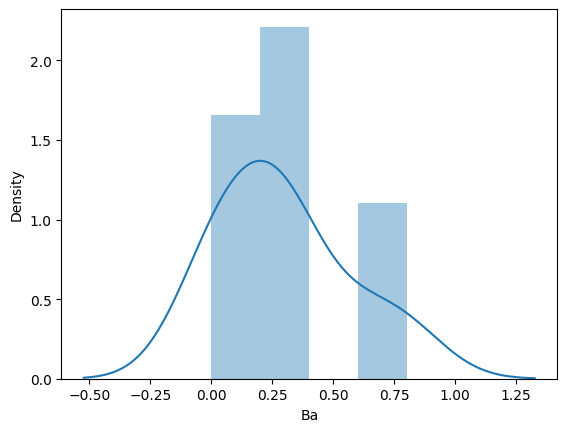

<ipython-input-142-06b24ff06754>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.values[i])


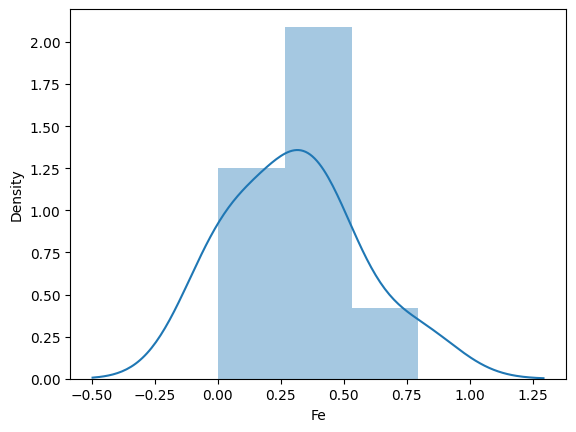

In [142]:
x = x_data.iloc[:, : 9]



for i in range(0,9):
        sns.distplot(x.values[i])
        plt.xlabel(x.columns[i])
        plt.show()

The data has been normalized and Si is now on the same scale as the others. Density charts are also showing that Skewness has been reduced.


In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3, random_state = 1)

f1_scores = [] # Save f1_scores
cm_ = [] # Save Confusion Matrixes
cv_accuracies = [] # Save Cross Validation Accuracies
cv_mean = [] # Save Mean of Cross Validation ACcuracies

### 4) Creating Predictive Models

#### 4a) KNN

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In order to find an optimal K Value, we can create an array of Error Rates for K range 1-50. 

In [145]:
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Then create a plot to visualize the K values and their Error Rates.

Text(0, 0.5, 'Error Rate')

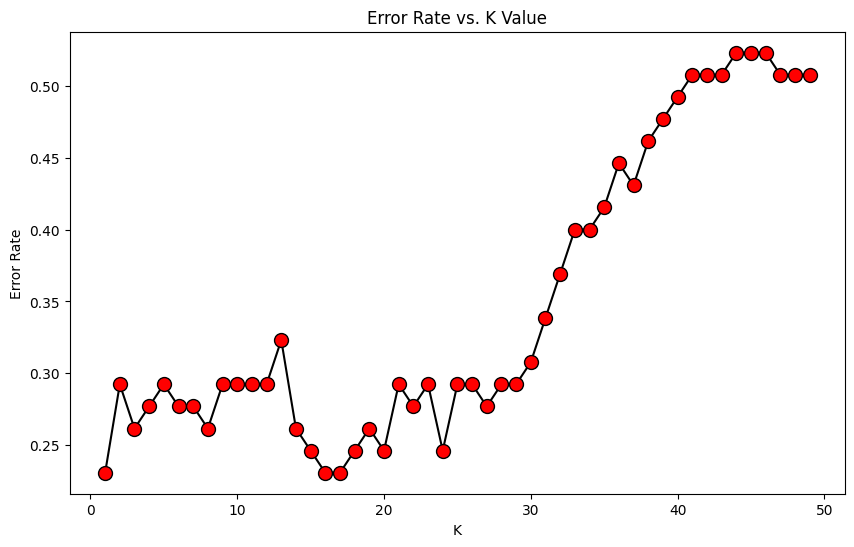

In [146]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='black',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [147]:
print("Error rate of K = 15 is" ,error_rate[15])
print("Error_rate of K = 16 is" ,error_rate[16])

Error rate of K = 15 is 0.23076923076923078
Error_rate of K = 16 is 0.23076923076923078


The lowest error rates shown by the plot are 1,16,and 17. Using 1 as a K value would most likely lead to serious Overfitting. 16 and 17 have equal Error Rates so 17 will be chosen as the K-Value for a smoother classification boundry. 


In [148]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test,pred_knn)
f1_knn = f1_score(y_test,pred_knn, average='macro')

cm_.append(cm_knn)
f1_scores.append(f1_knn)

#### 4b) Support Vector Classifier

In [149]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(y_test,pred_svc)
f1_svc = f1_score(y_test,pred_svc,average = "macro")

cm_.append(cm_svc)
f1_scores.append(f1_svc)

#### 4c) Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 300)

rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

cm_rfc = confusion_matrix(y_test,pred_rfc)
f1_rfc = f1_score(y_test,pred_rfc,average = "macro")

cm_.append(cm_rfc)
f1_scores.append(f1_rfc)

#### 4d) Decision Tree Classifier

In [151]:
from sklearn.model_selection import train_test_split
from sklearn import tree
dt = tree.DecisionTreeClassifier()

dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

cm_dt = confusion_matrix(y_test,pred_dt)
f1_dt = f1_score(y_test,pred_dt,average = "macro")

cm_.append(cm_dt)
f1_scores.append(f1_dt)

#### 4e) Using Cross Validation to check for Overfitting

In [152]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

for i in [knn, svc, rfc, dt]:
  accuracies = cross_val_score(i, X_train, y_train, cv = k_folds)
  cv_accuracies.append(accuracies)
  cv_mean.append(accuracies.mean())

In [153]:
f1_scores

[0.6893508730718033,
 0.6549997703366864,
 0.7602207825643773,
 0.6318796943796944]

In [154]:
cv_mean

[0.4974712643678161,
 0.5317241379310345,
 0.7314942528735632,
 0.6377011494252873]

By comparing the F1_score with Cross Validation Mean, we can see that RFC has the highest score in both. The F1_score is slightly higher, but this is to be expected as the F1_score is built on the model and not the unseen validation data.

In [155]:
cv_accuracies[2]

array([0.7       , 0.8       , 0.76666667, 0.66666667, 0.72413793])

The indivdual accuracies show how the model performs on the different KFolds.

### 5) Creating SMOTE Train and Test Data

[Text(0.5, 0, 'Type of Glass'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'After SMOTE')]

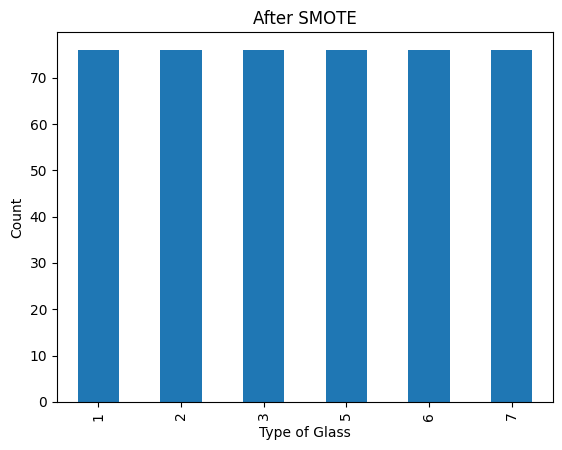

In [156]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
x_res, y_res = sm.fit_resample(x_data, y)
y_res_df = pd.DataFrame(y_res)
ax = y_res_df.type.value_counts().plot(kind="bar")
ax.set(xlabel="Type of Glass", ylabel="Count", title = "After SMOTE")

After applying SMOTE on the data, synthetic data has been created so the count of all Types are equal.

In [157]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_res,y_res, test_size=.30,random_state = 1 )

f1_scores2 = [] # Save f1_scores
cm_2 = [] #Save Confusion Matrixes
cv_accuracies2 = [] # Save Cross Validation Accuracies
cv_mean2 = [] # Save Mean of Cross Validation ACcuracies

### 6) Creating SMOTE Predictive Models

#### 6a) KNN

In [158]:
error_rate2 = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train2,y_train2)
 pred_i = knn.predict(X_test2)
 error_rate2.append(np.mean(pred_i != y_test2))

Text(0, 0.5, 'Error Rate')

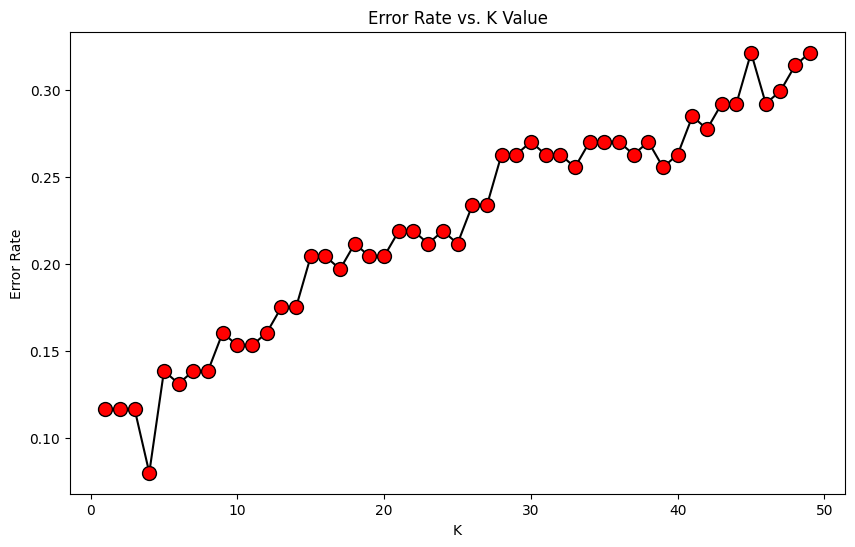

In [159]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate2,color='black',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The error rates here are very different from the previous KNN Model. The error rate for this model is increasing higher and higher. The value of K will be set to 4 for this model.

In [160]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train2, y_train2)
pred_knn = knn.predict(X_test2)


cm_knn = confusion_matrix(y_test2,pred_knn)
f1_knn = f1_score(y_test2,pred_knn, average='macro')

cm_2.append(cm_knn)
f1_scores2.append(f1_knn)


#### 6b) Support Vector Classifier

In [161]:
svc = SVC()

svc.fit(X_train2,y_train2)
pred_svc = svc.predict(X_test2)

cm_svc = confusion_matrix(y_test2,pred_svc)
f1_svc= f1_score(y_test2,pred_svc,average = "macro")

cm_2.append(cm_svc)
f1_scores2.append(f1_svc)

#### 6c) Random Forest Classifier

In [162]:
rfc = RandomForestClassifier(n_estimators = 300)

rfc.fit(X_train2,y_train2)
pred_rfc = rfc.predict(X_test2)

cm_rfc = confusion_matrix(y_test2,pred_rfc)
f1_rfc = f1_score(y_test2,pred_rfc,average = "macro")

cm_2.append(cm_rfc)
f1_scores2.append(f1_rfc)

#### 6d) Decision Tree Classifier

In [163]:
dt = tree.DecisionTreeClassifier()

dt.fit(X_train2, y_train2)
pred_dt = dt.predict(X_test2)

cm_dt = confusion_matrix(y_test2,pred_dt)
f1_dt = f1_score(y_test2,pred_dt,average = "macro")

cm_2.append(cm_dt)
f1_scores2.append(f1_dt)

#### 6e) Using Cross Validation to check for Overfitting

In [164]:
k_folds = KFold(n_splits = 5)

for i in [knn, svc, rfc, dt]:
  accuracies = cross_val_score(i, X_train2, y_train2, cv = k_folds)
  cv_accuracies2.append(accuracies)
  cv_mean2.append(accuracies.mean())

In [165]:
f1_scores2

[0.9153389105262087,
 0.7766829799769325,
 0.8874224628015694,
 0.8723574416880545]

In [166]:
cv_mean2

[0.8089781746031747, 0.727281746031746, 0.8778769841269842, 0.8088789682539682]

This time the highest F1 score is KNN, followed closely by RFC. However, the Cross Validation Mean for KNN is much lower than the F1 Score. This means the model is Overfitting, most likely due to a low K value. 

Even though the Cross Validation Mean for RFC is lower than F1 Score, the gap is not large enough to worry about Overfitting. 

In [167]:
cv_accuracies2[2]

array([0.875     , 0.875     , 0.90625   , 0.8125    , 0.92063492])

Once again, the individual accuracies show the models performance on the different KFolds.

### 7) Choosing the best Model

In [168]:
ModelNames = pd.DataFrame(['K-Nearest Neighbors','Support Vector Classifier','Random Forest Classifier', 'Decision Tree Classifier'])

f1_ = pd.DataFrame(f1_scores)
cv_m = pd.DataFrame(cv_mean)
cv_a = pd.DataFrame(cv_accuracies)

f1_2 = pd.DataFrame(f1_scores2)
cv_m2 = pd.DataFrame(cv_mean2)


ModelScores= pd.concat([ModelNames,f1_, cv_m, f1_2, cv_m2],axis=1)
ModelScores.columns=['Models','F1 Scores', 'CVM', 'F1 Scores - SMOTE', 'CVM - Smote']
ModelScores

,Models,F1 Scores,CVM,F1 Scores - SMOTE,CVM - Smote
0,K-Nearest Neighbors,0.689351,0.497471,0.915339,0.808978
1,Support Vector Classifier,0.655000,0.531724,0.776683,0.727282
2,Random Forest Classifier,0.760221,0.731494,0.887422,0.877877
3,Decision Tree Classifier,0.631880,0.637701,0.872357,0.808879


In [170]:
print('K Nearest Neighbors' + f'\n{cm_[0]}' + '\n')
print('K Nearest Neighbors - SMOTE' + f'\n{cm_2[0]}' + '\n')
print('Support Vector Classifier' + f'\n{cm_[1]}' + '\n')
print('Support Vector Classifier - SMOTE' + f'\n{cm_2[1]}' + '\n')
print('Random Forest Classifier' + f'\n{cm_[2]}' + '\n')
print('Random Forest Classifier - SMOTE' + f'\n{cm_2[2]}' + '\n')
print('Decision Tree Classifier' + f'\n{cm_[3]}' +'\n')
print('Decision Tree Classifier - SMOTE' + f'\n{cm_2[3]}')

K Nearest Neighbors
[[23  2  0  0  0  0]
 [ 3 16  0  0  1  1]
 [ 4  3  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  8]]

K Nearest Neighbors - SMOTE
[[22  0  0  0  0  0]
 [ 1 15  2  0  0  0]
 [ 1  4 18  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  0  0  0 18  0]
 [ 1  0  0  2  0 24]]

Support Vector Classifier
[[12 13  0  0  0  0]
 [ 1 20  0  0  0  0]
 [ 3  4  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  9]]

Support Vector Classifier - SMOTE
[[14  1  7  0  0  0]
 [ 1  8  9  0  0  0]
 [ 3  3 17  0  0  0]
 [ 0  0  0 27  0  2]
 [ 0  0  0  0 18  0]
 [ 1  0  0  2  0 24]]

Random Forest Classifier
[[23  1  1  0  0  0]
 [ 1 18  0  0  1  1]
 [ 4  2  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  9]]

Random Forest Classifier - SMOTE
[[20  1  1  0  0  0]
 [ 2 12  2  2  0  0]
 [ 2  0 21  0  0  0]
 [ 0  0  0 27  0  2]
 [ 0  0  0  0 18  0]
 [ 1  0  0  2  0 24]]

Decision Tree Classifier
[[19  5  1  0  0  0]
 [ 2 14  3  1  1  0]

Based on the results, both pre and post SMOTE, the best performing model is Random Forest Classifier. The results of the models after Oversampling show the affect that data imbalance can have. Even so, the RFC Model still performed rather well with the imbalanced data. 
 